In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from scipy.sparse import hstack
import nltk
from wordcloud import WordCloud
import pandas as pd
from sklearn.model_selection import train_test_split


In [11]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
# set palette color
plt.style.use(PLOT_PALETTE)
%matplotlib inline

In [12]:
dataset_1 = pd.read_csv("data/Resume/Resume.csv")
dataset_2 = pd.read_csv("data/Resume/UpdatedResumeDataSet.csv")


In [13]:
dataset_1.rename(columns={'Resume_str':'Resume','Category':'Category'},inplace=True)
dataset_1 =dataset_1[['Resume','Category']]
dataset_2 = dataset_2[['Resume','Category']]


In [14]:
dataset_1['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [15]:
dataset_2['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

# Data pre-process 
    1. Second dataset also has Sales column. Therefor I have decided to marge them. 
    2. Second dataset also has HR column. Therefor I have decided to marge them. 
    3. Second dataset also has Arts column. Therefor I have decided to marge them. 
    4. Software engineering professionals belong to the IT department, so I have decided to merge software engineers with IT.
    5. Second dataset also has Fitness column. Therefor I have decided to marge them.
    6. Civil engineering professionals belong to the CONSTRUCTION department, so I have decided to merge civil enginners with construction.
    7. Bussiness analytcs professionals and PMO belong to the bussiness development department, so I have decided to merge bussiness analytcs professionals and PMO with bussiness development department.
    8. Second dataset also has Advocate column. Therefor I have decided to marge them.
    9. I have merged  Mechanical Engineer and Electrical Engineering columns with the engineering column. 

In [33]:
#task 1
sales_from_2 =  dataset_2.loc[dataset_2['Category'] =='Sales']
sales_from_2['Category'] = sales_from_2.Category.replace('Sales', 'SALES')
# task 2 
HR_from_2 =  dataset_2.loc[dataset_2['Category'] =='HR']
#task 3
arts_from_2 =  dataset_2.loc[dataset_2['Category'] =='Arts']
arts_from_2['Category'] = arts_from_2.Category.replace('Arts', 'ARTS')
#task 4 
cs_category =  ['SAP Developer','Java Developer','ETL Developer','DevOps Engineer','Network Security Engineer','Python Developer', 'Web Designing',  'Hadoop', 'Blockchain' , 'Data Science' , 'Database' ,'DotNet Developer','Automation Testing']
replace_with = ['INFORMATION-TECHNOLOGY'] *13
it_from_2 = dataset_2.loc[dataset_2['Category'].isin(cs_category)]
it_from_2['Category'] = it_from_2['Category'].replace(cs_category, replace_with)
it_from_2 = it_from_2.sample(frac = 1)
#task 5 
fitness_from_2 =  dataset_2.loc[dataset_2['Category'] =='Health and fitness']
fitness_from_2['Category'] = fitness_from_2.Category.replace('Health and fitness', 'FITNESS')
#task 6
cons_from_2 = dataset_2.loc[dataset_2['Category']=='Civil Engineer']
cons_from_2['Category'] = cons_from_2['Category'].replace('Civil Engineer','CONSTRUCTION')
cons_from_2 = cons_from_2.sample(frac = 1)
#task 7 
bd_category = ['Business Analyst','PMO','Operations Manager']
bd_from_2 = dataset_2.loc[dataset_2['Category'].isin(bd_category)]
bd_from_2['Category'] = bd_from_2['Category'].replace(bd_category,['BUSINESS-DEVELOPMENT','BUSINESS-DEVELOPMENT','BUSINESS-DEVELOPMENT'])
bd_from_2 = bd_from_2.sample(frac = 1)
#task 8 
advocate_from_2 =  dataset_2.loc[dataset_2['Category'] =='Advocate']
advocate_from_2['Category'] = advocate_from_2.Category.replace('Advocate', 'ADVOCATE')

#task 9
eng_category = ['Mechanical Engineer', 'Electrical Engineering', 'Testing']
eng_from_2 = dataset_2.loc[dataset_2['Category'].isin(eng_category)]
eng_from_2['Category'] = eng_from_2['Category'].replace(eng_category,['ENGINEERING']*3) 
eng_from_2 = eng_from_2.sample(frac = 1)




In [35]:
 dataset = pd.concat([dataset_1,sales_from_2]) #task 1
 dataset = pd.concat([dataset,HR_from_2])   #task 2
 dataset = pd.concat([dataset,arts_from_2]) #task 3
 dataset = pd.concat([dataset,it_from_2.iloc[:50]]) #task 4
 dataset = pd.concat([dataset,fitness_from_2]) #task 5
 dataset = pd.concat([dataset,cons_from_2]) #task 6
 dataset = pd.concat([dataset, bd_from_2.iloc[:40]])
 dataset = pd.concat([dataset, advocate_from_2]) #task 8
 dataset = pd.concat([dataset,eng_from_2.iloc[:45] ]) #task 9

 


In [36]:
len(cs_category)

13

In [37]:
category = dataset['Category'].value_counts().reset_index()
category

Category  count
0   INFORMATION-TECHNOLOGY    170
1              ENGINEERING    163
2     BUSINESS-DEVELOPMENT    160
3                    SALES    156
4                       HR    154
5                  FITNESS    147
6                     ARTS    139
7                 ADVOCATE    138
8             CONSTRUCTION    136
9               ACCOUNTANT    118
10                    CHEF    118
11                 FINANCE    118
12                AVIATION    117
13              CONSULTANT    115
14              HEALTHCARE    115
15                 BANKING    115
16        PUBLIC-RELATIONS    111
17                DESIGNER    107
18                 TEACHER    102
19                 APPAREL     97
20           DIGITAL-MEDIA     96
21             AGRICULTURE     63
22              AUTOMOBILE     36
23                     BPO     22

In [38]:
# dataset.Category = dataset.Category.replace(['Advocate','Sales'],['ADVOCATE','SALES'])
# dataset.Category = dataset.Category.replace(['HEALTHCARE','FITNESS', 'Health and fitness'],['HEALTHCARE AND FITNESS','HEALTHCARE AND FITNESS','HEALTHCARE AND FITNESS'])
# dataset.Category = dataset.Category.replace(['Arts'],['ARTS'])

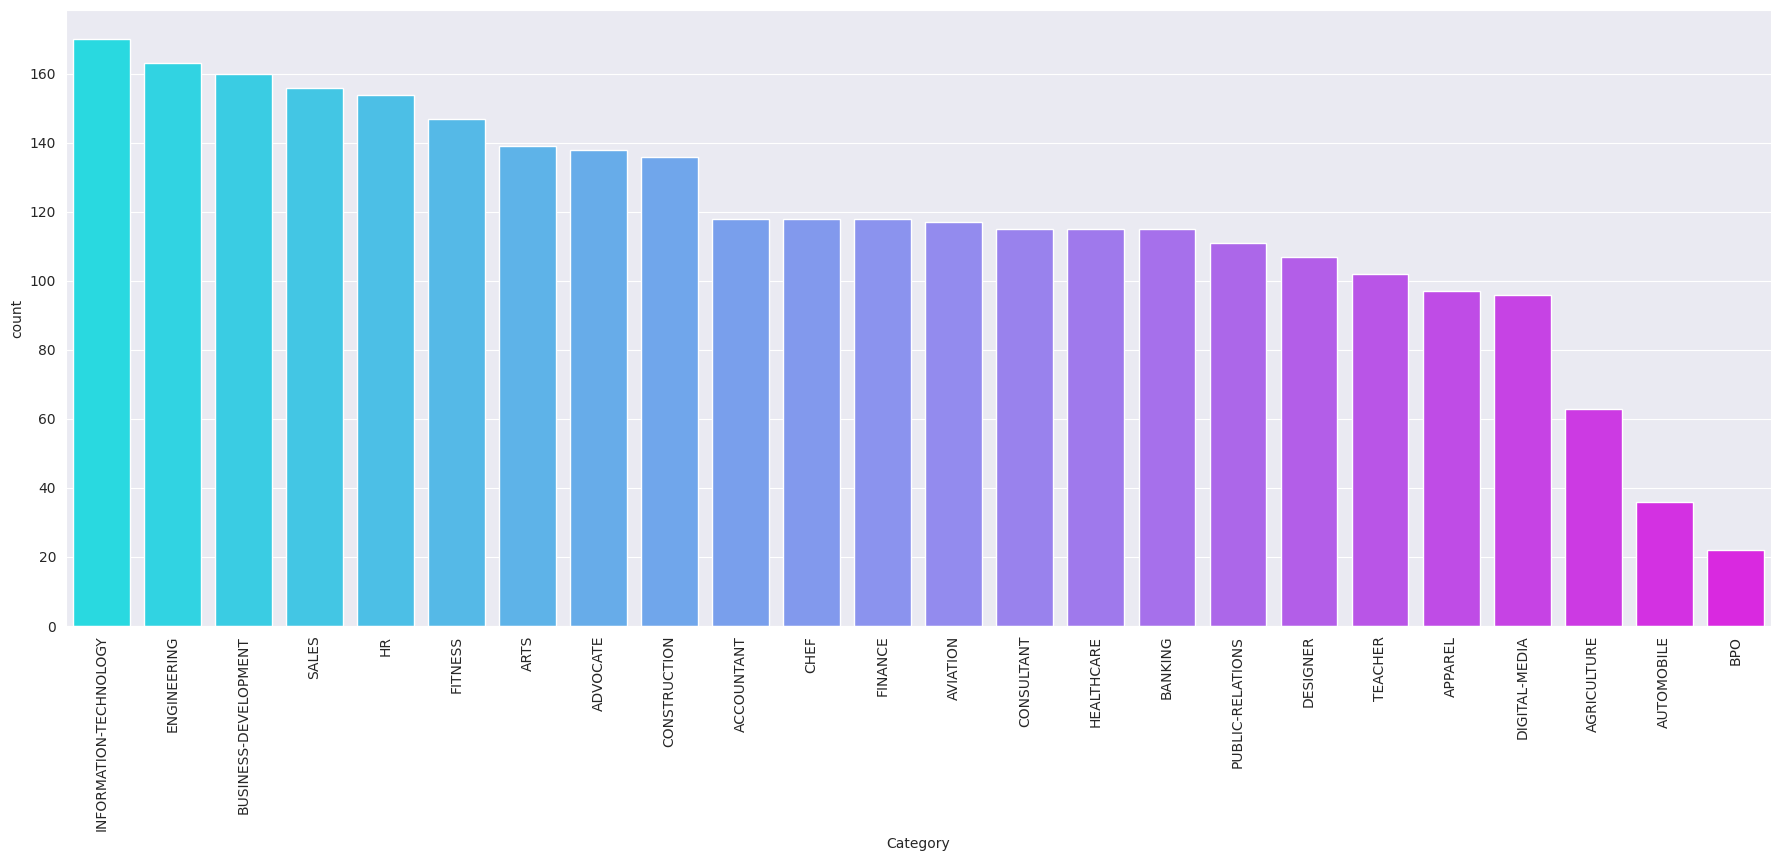

In [39]:
plt.figure(figsize=(22,8))
plt.xticks(rotation=90)
sns.barplot(x=category['Category'], y=category['count'], palette='cool')
plt.show()

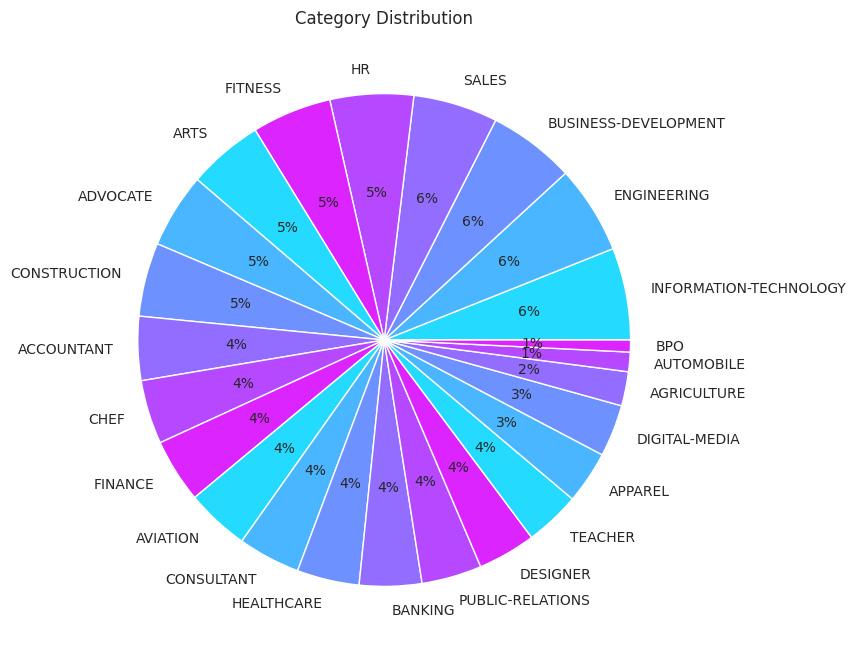

In [40]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=90)
plt.pie(category['count'], labels=category['Category'],
        colors=sns.color_palette('cool'), autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()

In [41]:
import re

# Preprocessing

In [42]:
def preprocess(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('http\S+\s*', ' ', txt)  # remove URLs
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub('RT|cc', ' ', txt)  # remove RT and cc
    txt = re.sub('#\S+', '', txt)  # remove hashtags
    txt = re.sub('@\S+', '  ', txt)  # remove mentions
    txt = re.sub('\s+', ' ', txt)  # remove extra whitespace
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]
    

    return ' '.join(txt)

In [43]:
# preprocessing text
dataset['Resume_clean'] = dataset['Resume'].apply(lambda w: preprocess(w))

In [45]:
# Split the data into train and temporary (val+test) sets
train_data, temp_data = train_test_split(dataset, test_size=0.2, random_state=42, stratify=dataset['Category'])

# Split the temporary data into validation and test sets
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42, stratify=temp_data['Category'])

# Print the sizes of each split
print("Train size:", len(train_data))
print("Validation size:", len(val_data))
print("Test size:", len(test_data))

Train size: 2250
Validation size: 281
Test size: 282


In [49]:
train_data.reset_index(drop= True, inplace = True)
test_data.reset_index(drop= True, inplace = True)
val_data.reset_index(drop= True, inplace = True)

In [51]:
train_data.to_csv('data/dataset/train.csv')
test_data.to_csv('data/dataset/test.csv')
val_data.to_csv('data/dataset/val.csv')

In [21]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = processed_df['Resume_clean'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

NameError: name 'processed_df' is not defined

In [34]:
import string
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')  # Download the punkt tokenizer if not already downloaded
nltk.download('stopwords')  # Download the stopwords if not already downloaded

oneSetOfStopWords = set(stopwords.words('english') + ['``', "''"])
totalWords = []
Sentences = dataset['Resume_clean'].values
cleanedSentences = ""

for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(5)  # Retrieve the 5 most common words
print("Most common words (including stopwords):")
print(mostcommon)

# Remove the most common 5 words
common_words = set(word for word, _ in mostcommon)
filtered_words = [word for word in totalWords if word not in common_words]

filtered_freqdist = nltk.FreqDist(filtered_words)
filtered_mostcommon = filtered_freqdist.most_common(10)  # Retrieve the 10 most common words after removing the top 5

print("\nMost common words (excluding top 5):")
print(filtered_mostcommon)


[nltk_data] Downloading package punkt to /home/sourav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sourav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most common words (including stopwords):
[('company', 16492), ('state', 16249), ('city', 15088), ('management', 12813), ('name', 11826)]

Most common words (excluding top 5):
[('sales', 8852), ('business', 8231), ('customer', 8194), ('skills', 8063), ('team', 6753), ('new', 6626), ('service', 6339), ('project', 6331), ('development', 6060), ('training', 5842)]


In [32]:
filtered_df

Resume     Category  \
0             HR ADMINISTRATOR/MARKETING ASSOCIATE\...           HR   
1             HR SPECIALIST, US HR OPERATIONS      ...           HR   
2             HR DIRECTOR       Summary      Over 2...           HR   
3             HR SPECIALIST       Summary    Dedica...           HR   
4             HR MANAGER         Skill Highlights  ...           HR   
..                                                 ...          ...   
905  Skill Set OS Windows XP/7/8/8.1/10 Database MY...  ENGINEERING   
189  * I'm hard working person. * I'm self confiden...  ENGINEERING   
211  SKILLS: â¢ Knowledge of software / computer: ...  ENGINEERING   
215  Education Details \r\nMay 1999 to September 20...  ENGINEERING   
498  â¢ Achievement oriented with people managemen...  ENGINEERING   

                                          Resume_clean  
0    hr administrator marketing associate hr admini...  
1    hr administrator marketing associate hr admini...  
2    hr administrator marketing associate hr admini...  
3    hr administrator marketing associate hr admini...  
4    hr administrator marketing associate hr admini...  
..                                                 ...  
905  hr administrator marketing associate hr admini...  
189  hr administrator marketing associate hr admini...  
211  hr administrator marketing associate hr admini...  
215  hr administrator marketing associate hr admini...  
498  hr administrator marketing associate hr admini...  

[2813 rows x 3 columns]

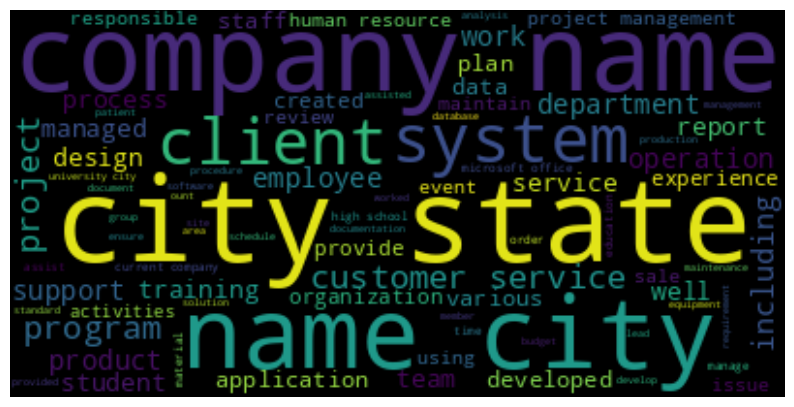

In [159]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
# create list of all categories
categories = np.sort(dataset['Category'].unique())
categories

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [25]:
# create new df for corpus and category
df_categories = [dataset[dataset['Category'] == category].loc[:, ['Resume_clean', 'Category']] for category in categories]
df_categories

[                                           Resume_clean    Category
 1808  ountant professional summary current ountant c...  ACCOUNTANT
 1809  ountant summary innovative energetic ountant p...  ACCOUNTANT
 1810  ountant highlights microsoft office intermedia...  ACCOUNTANT
 1811  ountant professional summary inpatient outpati...  ACCOUNTANT
 1812  ountant summary pursue excellence dynamic busi...  ACCOUNTANT
 ...                                                 ...         ...
 1921  general ountant professional summary around ye...  ACCOUNTANT
 1922  staff ountant professional summary currently g...  ACCOUNTANT
 1923  general ountant summary years experienced prof...  ACCOUNTANT
 1924  project ountant career focus dedicated focused...  ACCOUNTANT
 1925  senior ountant summary highly competent motiva...  ACCOUNTANT
 
 [118 rows x 2 columns],
                                           Resume_clean  Category
 439  advocate professional summary conscientious at...  ADVOCATE
 440  advocat

In [26]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resume_clean'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

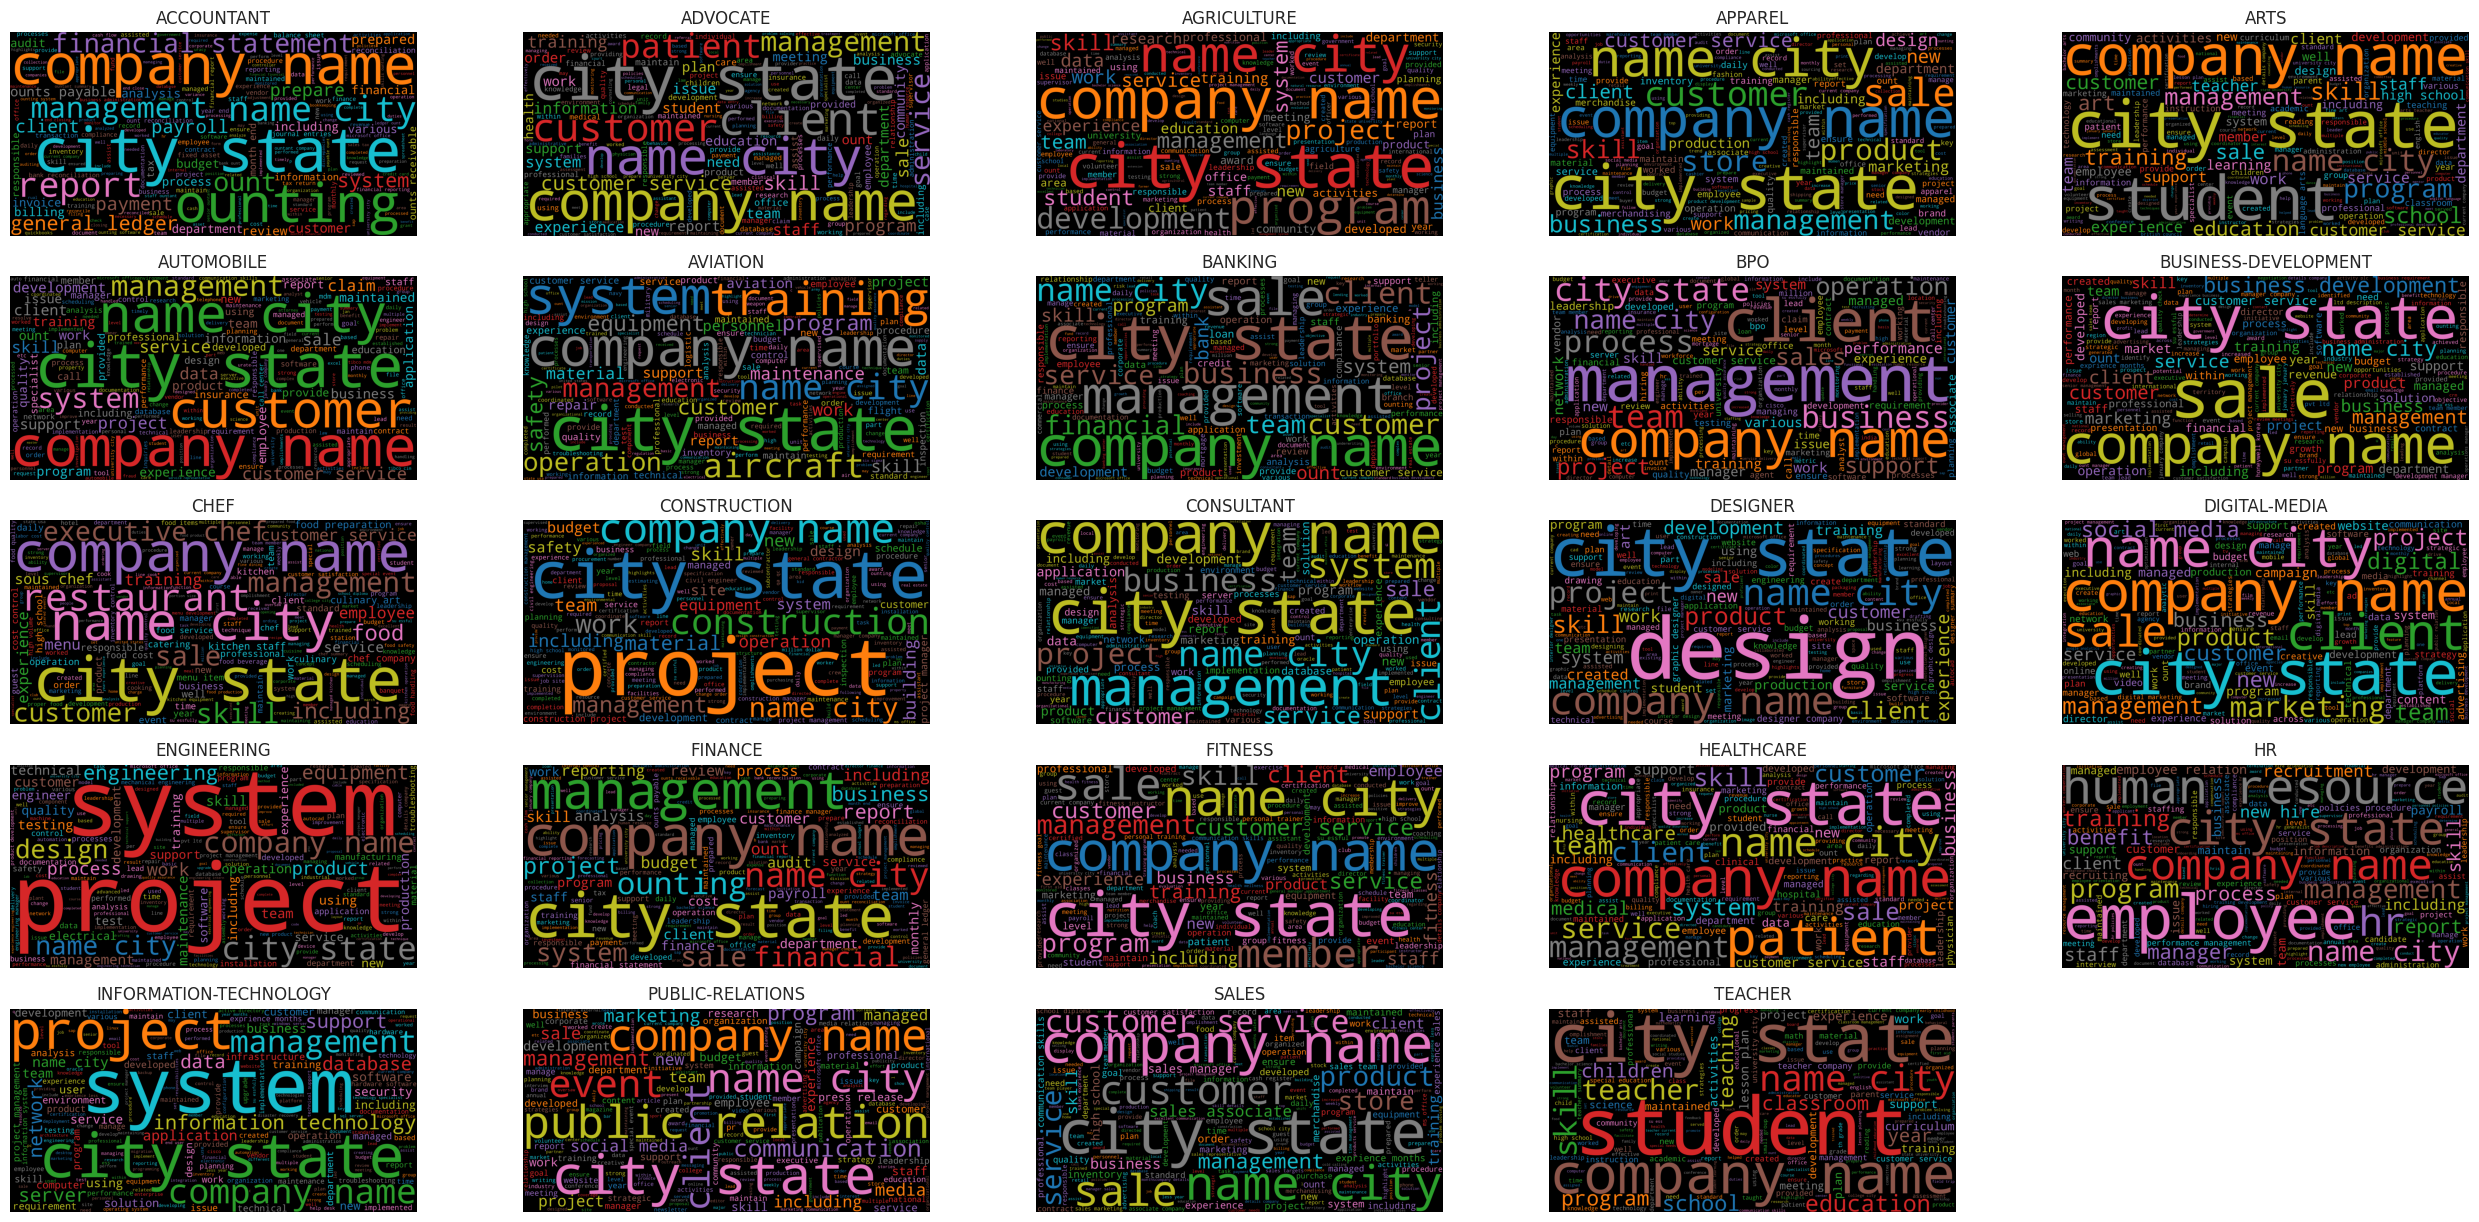

In [27]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(9, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

I have categorige of all the classes into X categorigy. such as 

In [164]:
# cs_category =  ['Java Developer' 'DevOps Engineer','Python Developer', 'Web Designing',  'Hadoop', 'Blockchain' , 'Data Science' , 'Database' ,'DotNet Developer']
# replace_with = ['COMPUTER_ENGINEER','COMPUTER_ENGINEER','COMPUTER_ENGINEER','COMPUTER_ENGINEER','COMPUTER_ENGINEER','COMPUTER_ENGINEER','COMPUTER_ENGINEER','COMPUTER_ENGINEER',]
# dataset['Category'] = dataset['Category'].replace(cs_category, replace_with) 


In [179]:
from collections import Counter
import pandas as pd

def remove_frequent_words_by_class(df, text_column, class_column, threshold_percent=0.1):
    # Calculate word frequencies for each class
    word_frequencies_by_class = {}
    classes = df[class_column].unique()
    
    for class_label in classes:
        class_texts = df[df[class_column] == class_label][text_column]
        word_frequencies = Counter()
        
        for text in class_texts:
            words = text.split()
            word_frequencies.update(words)
        
        word_frequencies_by_class[class_label] = word_frequencies
        print(word_frequencies_by_class)
        input("!!!")
    
    # Determine frequent words for each class based on threshold
    frequent_words_by_class = {}
    for class_label, word_frequencies in word_frequencies_by_class.items():
        total_words = sum(word_frequencies.values())
        threshold_count = int(total_words * threshold_percent)
        frequent_words = {word for word, count in word_frequencies.items() if count > threshold_count}
        frequent_words_by_class[class_label] = frequent_words
    
    # Remove frequent words from texts
    processed_texts = []
    for _, row in df.iterrows():
        text = row[text_column]
        class_label = row[class_column]
        frequent_words = frequent_words_by_class[class_label]
        
        words = text.split()
        filtered_words = [word for word in words if word not in frequent_words]
        processed_text = ' '.join(filtered_words)
        
        processed_texts.append(processed_text)
    
    processed_df = df.copy()
    processed_df[text_column] = processed_texts
    return processed_df

# Example usage


processed_df = remove_frequent_words_by_class(dataset, text_column='Resume_clean', class_column='Category', threshold_percent=0.2)
print(processed_df)


{'HR': Counter({'hr': 1149, 'management': 1010, 'employee': 848, 'company': 824, 'state': 666, 'human': 603, 'city': 568, 'employees': 520, 'training': 518, 'new': 465, 'name': 455, 'resources': 416, 'skills': 404, 'benefits': 396, 'business': 390, 'payroll': 361, 'development': 348, 'performance': 325, 'process': 322, 'policies': 317, 'recruitment': 312, 'office': 281, 'staff': 252, 'including': 249, 'experience': 248, 'relations': 245, 'job': 244, 'administration': 241, 'procedures': 240, 'manager': 239, 'customer': 236, 'programs': 235, 'issues': 231, 'recruiting': 231, 'information': 230, 'team': 229, 'program': 223, 'compensation': 218, 'personnel': 216, 'support': 213, 'professional': 208, 'reports': 207, 'resource': 206, 'service': 203, 'system': 199, 'work': 197, 'managers': 197, 'data': 191, 'education': 190, 'university': 190, 'hiring': 189, 'organizational': 187, 'compliance': 180, 'managed': 172, 'leadership': 170, 'employment': 167, 'administrative': 159, 'staffing': 158, 

{'HR': Counter({'hr': 1149, 'management': 1010, 'employee': 848, 'company': 824, 'state': 666, 'human': 603, 'city': 568, 'employees': 520, 'training': 518, 'new': 465, 'name': 455, 'resources': 416, 'skills': 404, 'benefits': 396, 'business': 390, 'payroll': 361, 'development': 348, 'performance': 325, 'process': 322, 'policies': 317, 'recruitment': 312, 'office': 281, 'staff': 252, 'including': 249, 'experience': 248, 'relations': 245, 'job': 244, 'administration': 241, 'procedures': 240, 'manager': 239, 'customer': 236, 'programs': 235, 'issues': 231, 'recruiting': 231, 'information': 230, 'team': 229, 'program': 223, 'compensation': 218, 'personnel': 216, 'support': 213, 'professional': 208, 'reports': 207, 'resource': 206, 'service': 203, 'system': 199, 'work': 197, 'managers': 197, 'data': 191, 'education': 190, 'university': 190, 'hiring': 189, 'organizational': 187, 'compliance': 180, 'managed': 172, 'leadership': 170, 'employment': 167, 'administrative': 159, 'staffing': 158, 

In [177]:
processed_df

Resume     Category  \
0             HR ADMINISTRATOR/MARKETING ASSOCIATE\...           HR   
1             HR SPECIALIST, US HR OPERATIONS      ...           HR   
2             HR DIRECTOR       Summary      Over 2...           HR   
3             HR SPECIALIST       Summary    Dedica...           HR   
4             HR MANAGER         Skill Highlights  ...           HR   
..                                                 ...          ...   
901  Computer Skills: â¢ Proficient in MS office (...  ENGINEERING   
934  â¢ Good logical and analytical skills â¢ Pos...  ENGINEERING   
916  â Willingness to accept the challenges. â ...  ENGINEERING   
204  * I'm hard working person. * I'm self confiden...  ENGINEERING   
487  Education Details \r\n\r\nElectrical engineeri...  ENGINEERING   

                                          Resume_clean  
0    hr administrator marketing associate hr admini...  
1    hr specialist us hr operations summary versati...  
2    hr director summary years experience recruitin...  
3    hr specialist summary dedicated driven dynamic...  
4    hr manager skill highlights hr skills hr depar...  
..                                                 ...  
901  computer skills proficient ms office word basi...  
934  good logical analytical skills positive attitu...  
916  willingness ept challenges positive thinking g...  
204  hard working person self confident mould work ...  
487  education details electrical engineering skill...  

[2813 rows x 3 columns]

In [171]:
import nltk
from nltk import word_tokenize
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.probability import FreqDist

# Sample text
text = "The quick brown fox jumps over the lazy dog. The lazy dog barks."

# Tokenize the text into words
tokens = word_tokenize(text)

# Calculate unigram frequency
unigrams = FreqDist(tokens)

# Calculate bigram frequency
bigram_tuples = list(bigrams(tokens))
bigrams_freq = FreqDist(bigram_tuples)

# Calculate trigram frequency
trigram_tuples = list(ngrams(tokens, 3))
trigrams_freq = FreqDist(trigram_tuples)

# Print the results
print("Unigrams:")
print(unigrams.most_common())

print("\nBigrams:")
print(bigrams_freq.most_common())

print("\nTrigrams:")
print(trigrams_freq.most_common())

Unigrams:
[('The', 2), ('lazy', 2), ('dog', 2), ('.', 2), ('quick', 1), ('brown', 1), ('fox', 1), ('jumps', 1), ('over', 1), ('the', 1), ('barks', 1)]

Bigrams:
[(('lazy', 'dog'), 2), (('The', 'quick'), 1), (('quick', 'brown'), 1), (('brown', 'fox'), 1), (('fox', 'jumps'), 1), (('jumps', 'over'), 1), (('over', 'the'), 1), (('the', 'lazy'), 1), (('dog', '.'), 1), (('.', 'The'), 1), (('The', 'lazy'), 1), (('dog', 'barks'), 1), (('barks', '.'), 1)]

Trigrams:
[(('The', 'quick', 'brown'), 1), (('quick', 'brown', 'fox'), 1), (('brown', 'fox', 'jumps'), 1), (('fox', 'jumps', 'over'), 1), (('jumps', 'over', 'the'), 1), (('over', 'the', 'lazy'), 1), (('the', 'lazy', 'dog'), 1), (('lazy', 'dog', '.'), 1), (('dog', '.', 'The'), 1), (('.', 'The', 'lazy'), 1), (('The', 'lazy', 'dog'), 1), (('lazy', 'dog', 'barks'), 1), (('dog', 'barks', '.'), 1)]
